# Exercise 3 of Logistic Regression - Customer purchase analyis

## Importing the Modules

In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Importing the Dataset

In [183]:
df = pd.read_excel('marketing.xlsx')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Purchasing behaviour       24 non-null     object
 1   Gender                     24 non-null     object
 2   Age                        24 non-null     int64 
 3   Time spent in online shop  24 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 900.0+ bytes


In [185]:
df.head()

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,Buy now,female,22,40
1,Buy now,female,25,23
2,Buy now,male,18,12
3,Buy now,male,45,28
4,Buy now,female,12,43


## Convert Category into numerical

In [186]:
label_encoder = LabelEncoder()
df['Purchasing behaviour'] = label_encoder.fit_transform(df['Purchasing behaviour'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,1,0,22,40
1,1,0,25,23
2,1,1,18,12
3,1,1,45,28
4,1,0,12,43


## Selecting the features

In [187]:
feature_columns = [ "Gender",'Age', "Time spent in online shop"]
x = df[feature_columns]
y = df['Purchasing behaviour']

## Split the training Dataset

In [188]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(19, 3)

(19,)

(5, 3)

(5,)

## Train the Model

In [189]:
model = LogisticRegression(max_iter=1000,solver="lbfgs")
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Testing the trained model

In [190]:
y_pred = model.predict(x_test)

## Creating the confusion matrix and finding the accuracy of the model

In [191]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix :',conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score :',Accuracy_score)
print('Accuracy in Percentage:',int(Accuracy_score*100), '%' )

Confusion Matrix : [[0 0 1]
 [1 1 0]
 [0 0 2]]
Accuracy Score : 0.6
Accuracy in Percentage: 60 %


## Generating the heatmap for the confusion matrix

<Axes: xlabel='Predicted', ylabel='Actual'>

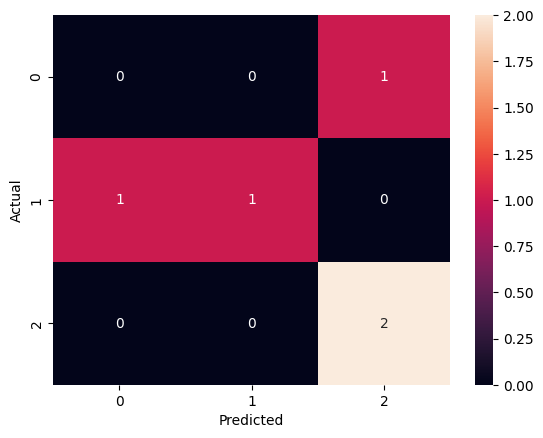

In [192]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True)